# Coursework1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs. 

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook and you can ignore the **tests** folder

#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the ```/content/``` directory (this is the default working directory - you can also change directories with ```%cd```)

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [13]:
!mkdir tests

In [14]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

     |████████████████████████████████| 165 kB 4.2 MB/s 
     |████████████████████████████████| 90 kB 7.8 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 117 kB 45.0 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 10.9 MB 26.0 MB/s 


In [15]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic pytorch operations to define the 2D convolution, 2D max pooling, linear layer as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not what to see any _for loops_!

**Your Task**
- implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        self.F = out_channels
        self.C = in_channels

        if isinstance(kernel_size, int):
            self.kernel_size = (kernel_size, kernel_size)
        else:
            self.kernel_size = kernel_size

        if isinstance(stride, int):
            self.stride = (stride, stride)
        else:
            self.stride = stride

        if isinstance(padding, int):
            self.padding = (padding, padding)
        else:
            self.padding = padding

        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        self.w = torch.zeros((out_channels, in_channels, self.kernel_size[0], self.kernel_size[1]))

        # Bias should have shape [out_channels] 
        if bias:
            self.b = torch.zeros((out_channels))
        else:
            self.b = None
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass     
        N, H, W = x.shape[0], x.shape[2], x.shape[3]
        H_out = (H + 2 * self.padding[0] - (self.kernel_size[0] - 1) - 1) / self.stride[0] + 1
        W_out = (W + 2 * self.padding[1] - (self.kernel_size[1] - 1) - 1) / self.stride[1] + 1
        H_out, W_out = int(H_out), int(W_out) 

        x_unf = F.unfold(x, kernel_size = self.kernel_size, padding = self.padding, stride = self.stride)
        kernel = self.w.view(self.w.shape[0], -1)
        out = kernel @ x_unf
        out = out.view(N, self.F, H_out, W_out)

        if self.b != None:
            out = torch.add(out, self.b.unsqueeze(1).unsqueeze(1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [17]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if isinstance(kernel_size, int):
            self.kernel_size = self.stride = (kernel_size, kernel_size)
        else:
            self.kernel_size = self.stride = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        N, C, H, W = x.shape
        H_out = 1 + (H - self.kernel_size[0]) / self.kernel_size[0]
        W_out = 1 + (W - self.kernel_size[1]) / self.kernel_size[1]
        H_out, W_out = int(H_out), int(W_out) 
        out = torch.zeros(N, C, H_out, W_out)

        # Assume stride_length = kernel_size
        x_unf = x.unfold(2, self.kernel_size[0], self.kernel_size[1]).unfold(3, self.kernel_size[1], self.kernel_size[0])
        out = x_unf.contiguous().view(x_unf.size()[:4] + (-1,)).max(dim=-1)[0]
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [19]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!

In [20]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros((in_channels, out_channels))
        if bias:
            self.b = torch.zeros((out_channels))
        else:
            self.b = None
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if self.b == None:
            out = x @ self.w
        else:
            out = x @ self.w + self.b
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [21]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!

In [22]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        self.beta = torch.zeros((num_features))
        self.gamma = torch.ones((num_features))

        # Initialize running means and variances
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        mean = x.mean(axis=(0, 2, 3), keepdims=True)
        var = x.var(axis=(0, 2, 3), keepdims=True)

        if self.training: # if training
            norm_x = (x - mean) / torch.sqrt(var + self.eps)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var
        else: # if testing
            norm_x = (x - self.running_mean.reshape(1, self.num_features, 1, 1)) / torch.sqrt(self.running_var.reshape(1, self.num_features, 1, 1) + self.eps)
        
        x = self.beta.reshape(1, self.num_features, 1, 1) + norm_x * self.gamma.reshape(1, self.num_features, 1, 1)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [23]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [1]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2022-02-07 14:41:12--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M  10.5MB/s    in 14s     

2022-02-07 14:41:28 (9.28 MB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2022-02-07 14:41:29--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1’

NaturalImageNetTrai 100%[===================>]   1.29G  5.03MB/s    in 4m 32

In [2]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [3]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

### Data Augmentation
transform_train = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.RandomRotation(15),# Random rotations
            transforms.GaussianBlur(3),# Blur the images
            transforms.ColorJitter(),# Randomly change the brightness, contrast, saturation and hue
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
transform_test = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 128

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

17986 1998 2000


In [4]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

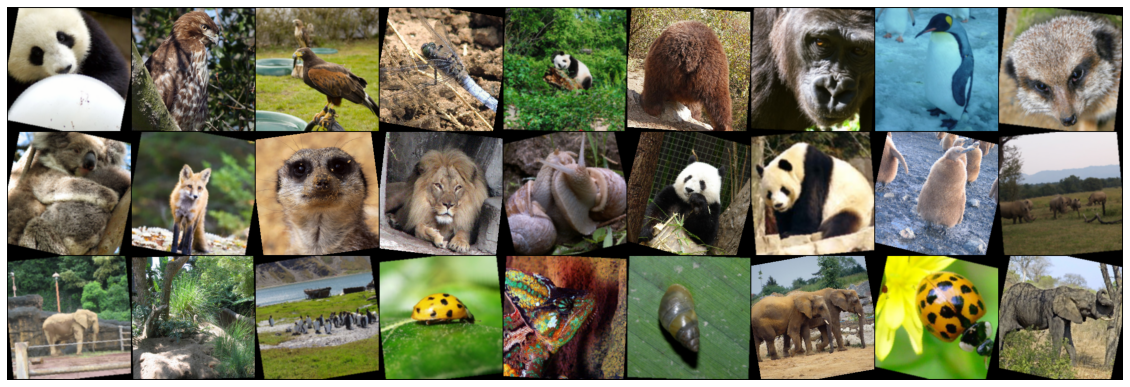

In [5]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [6]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [8]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)
                

cuda:0


In [ ]:
!pip install gpy
!pip install gpyopt

Epoch: 0, Iteration 0, loss = 4.0457
Epoch: 0, Iteration 10, loss = 4.0060
Epoch: 0, Iteration 20, loss = 3.0290
Epoch: 0, Iteration 30, loss = 2.9406
Epoch: 0, Iteration 40, loss = 3.4366
Epoch: 0, Iteration 50, loss = 3.2648
Epoch: 0, Iteration 60, loss = 2.8364
Epoch: 0, Iteration 70, loss = 2.9239
Epoch: 0, Iteration 80, loss = 2.6838
Epoch: 0, Iteration 90, loss = 3.0320
Epoch: 0, Iteration 100, loss = 2.9325
Epoch: 0, Iteration 110, loss = 2.5827
Epoch: 0, Iteration 120, loss = 2.4522
Epoch: 0, Iteration 130, loss = 2.5200
Epoch: 0, Iteration 140, loss = 2.4476
Got 371 / 1998 correct of val set (18.57)
Epoch: 1, Iteration 0, loss = 2.5019
Epoch: 1, Iteration 10, loss = 2.4150
Epoch: 1, Iteration 20, loss = 2.2586
Epoch: 1, Iteration 30, loss = 2.4135
Epoch: 1, Iteration 40, loss = 2.2593
Epoch: 1, Iteration 50, loss = 2.2950
Epoch: 1, Iteration 60, loss = 2.3525
Epoch: 1, Iteration 70, loss = 2.5516
Epoch: 1, Iteration 80, loss = 2.3407
Epoch: 1, Iteration 90, loss = 2.3754
Epoch

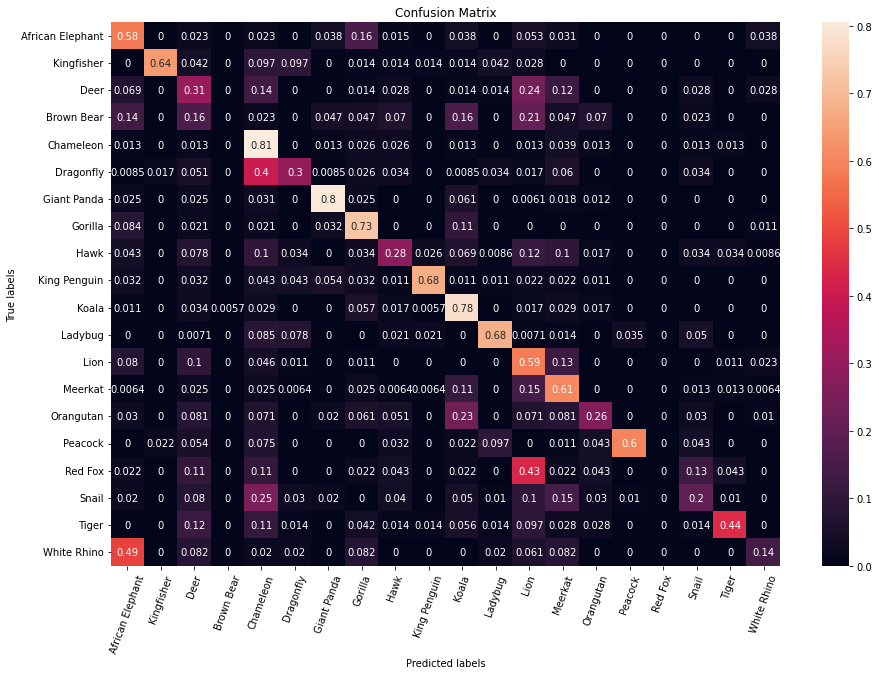

Predicted label ['Lion' 'Lion' 'Lion' 'Chameleon' 'Giant Panda' 'Koala' 'Chameleon'
 'Gorilla' 'Koala']
True label ['Snail' 'Koala' 'Deer' 'Deer' 'King Penguin' 'Peacock' 'Snail' 'Koala'
 'Hawk']
Corresponding images are shown below
Epoch: 0, Iteration 0, loss = 5.9426
Epoch: 0, Iteration 10, loss = 7.2163
Epoch: 0, Iteration 20, loss = 3.5653
Epoch: 0, Iteration 30, loss = 3.1862
Epoch: 0, Iteration 40, loss = 2.9715
Epoch: 0, Iteration 50, loss = 2.9623
Epoch: 0, Iteration 60, loss = 3.0078
Epoch: 0, Iteration 70, loss = 2.8905
Epoch: 0, Iteration 80, loss = 2.8786
Epoch: 0, Iteration 90, loss = 2.8877
Epoch: 0, Iteration 100, loss = 2.8601
Epoch: 0, Iteration 110, loss = 2.7490
Epoch: 0, Iteration 120, loss = 2.6586
Epoch: 0, Iteration 130, loss = 2.8711
Epoch: 0, Iteration 140, loss = 2.9166
Got 255 / 1998 correct of val set (12.76)
Epoch: 1, Iteration 0, loss = 2.6462
Epoch: 1, Iteration 10, loss = 2.6708
Epoch: 1, Iteration 20, loss = 2.6047
Epoch: 1, Iteration 30, loss = 2.4693


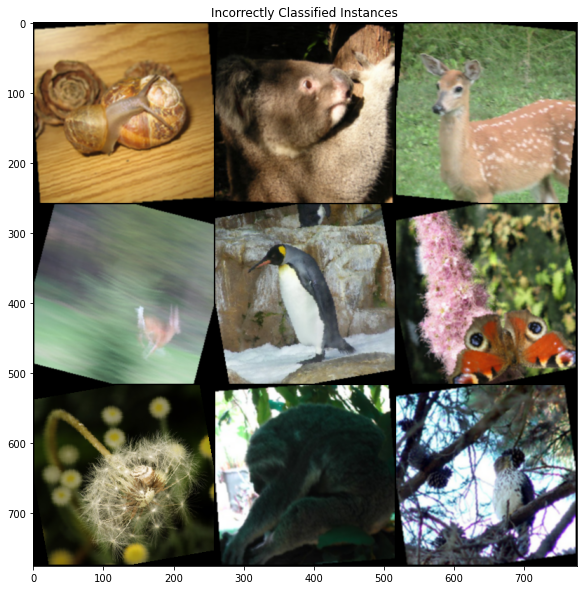

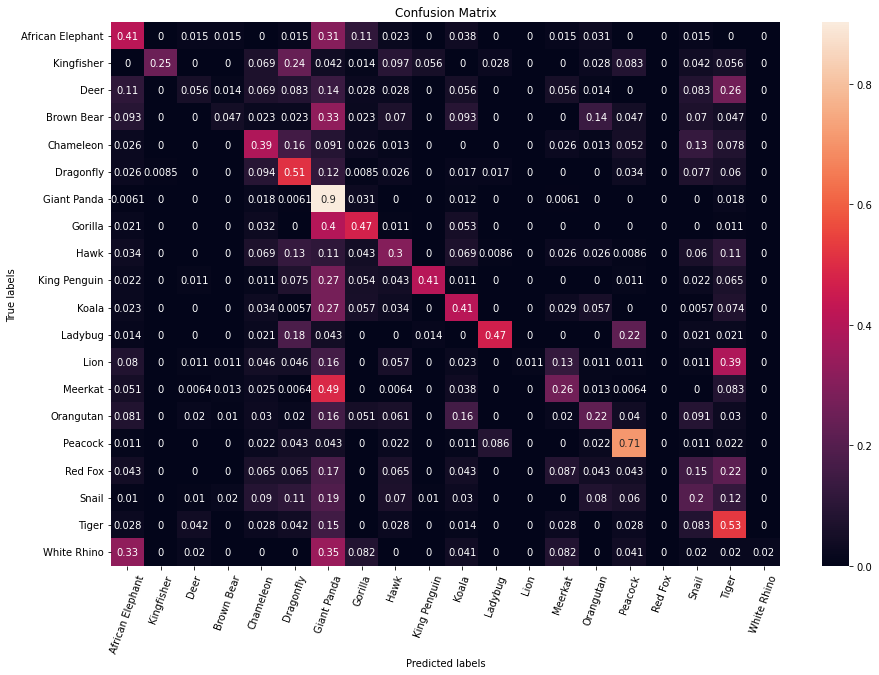

Predicted label ['Tiger' 'African Elephant' 'Giant Panda' 'Tiger' 'Hawk'
 'African Elephant' 'Tiger' 'African Elephant' 'Gorilla']
True label ['Hawk' 'Koala' 'Tiger' 'Deer' 'Brown Bear' 'Brown Bear' 'Koala' 'Deer'
 'Koala']
Corresponding images are shown below
Epoch: 0, Iteration 0, loss = 3.6534
Epoch: 0, Iteration 10, loss = 3.3064
Epoch: 0, Iteration 20, loss = 2.8651
Epoch: 0, Iteration 30, loss = 2.7781
Epoch: 0, Iteration 40, loss = 2.5226
Epoch: 0, Iteration 50, loss = 2.5215
Epoch: 0, Iteration 60, loss = 2.4458
Epoch: 0, Iteration 70, loss = 2.4941
Epoch: 0, Iteration 80, loss = 2.3548
Epoch: 0, Iteration 90, loss = 2.3295
Epoch: 0, Iteration 100, loss = 2.4779
Epoch: 0, Iteration 110, loss = 2.5718
Epoch: 0, Iteration 120, loss = 2.2721
Epoch: 0, Iteration 130, loss = 2.3115
Epoch: 0, Iteration 140, loss = 2.1227
Got 552 / 1998 correct of val set (27.63)
Epoch: 1, Iteration 0, loss = 2.2715
Epoch: 1, Iteration 10, loss = 2.0782
Epoch: 1, Iteration 20, loss = 2.1392
Epoch: 1, 

In [ ]:
### Hyperparameter Tuning
# Bayesian Optimization - tuned learning rate and weight decay in Adam optimiser
# Very time consuming, keeps timing out in Colab
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization


def Bayesian_optimization(params):
    params = params.squeeze()
    optimizer = optim.Adam(model.parameters(), lr=params[0], weight_decay=params[1])
    model = MyResNet()
    train_part(model, optimizer, epochs = 10)
    return check_accuracy(loader_val, model) # Return the test accuracy

# Define the search range for hyperparameters
domain = [{'name': 'learning_rate', 'type': 'continuous', 'domain': (0.0001, 0.01)},
      {'name': 'weight_decay', 'type': 'continuous', 'domain': (0, 0.01)}]

BO = BayesianOptimization(f = Bayesian_optimization, domain = domain,    
                          model_type = 'GP', acquisition_type = 'EI',
                          maximize = True)

BO.run_optimization(max_iter=20, max_time=50, eps=10e-6) # Very slow
print("Best hyperparameters: learning rate = %.7f, weight decay = %.7f. Accuracy: %.2f"%(BO.x_opt[0], BO.x_opt[1], BO.fx_opt))

In [9]:
### Hyperparameter Tuning
# Random Search - tuned learning_rate, epochs, optimizer
model = MyResNet()

learning_rate = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
epoch = [6,7,8,9,10]
optimizers = [optim.Adam(model.parameters(), lr = learning_rate[1]),
              optim.SGD(model.parameters(), lr = learning_rate[1]),
              optim.RMSprop(model.parameters(), lr = learning_rate[1])]

# define and train the network with a random set of hyperparameters
train_part(model, optimizers[0], epochs = epoch[4]) # Adam with 10 epochs

# report test set accuracy
# check_accuracy(loader_test, model, analysis = True)

# save the model
# torch.save(model.state_dict(), 'model.pt')

Epoch: 0, Iteration 0, loss = 4.0457
Epoch: 0, Iteration 10, loss = 3.0265
Epoch: 0, Iteration 20, loss = 2.9522
Epoch: 0, Iteration 30, loss = 2.7449
Epoch: 0, Iteration 40, loss = 2.8315
Epoch: 0, Iteration 50, loss = 2.6483
Epoch: 0, Iteration 60, loss = 2.3308
Epoch: 0, Iteration 70, loss = 2.4732
Epoch: 0, Iteration 80, loss = 2.2477
Epoch: 0, Iteration 90, loss = 2.4694
Epoch: 0, Iteration 100, loss = 2.4774
Epoch: 0, Iteration 110, loss = 2.1612
Epoch: 0, Iteration 120, loss = 2.0162
Epoch: 0, Iteration 130, loss = 2.0326
Epoch: 0, Iteration 140, loss = 2.0358
Got 723 / 1998 correct of val set (36.19)
Epoch: 1, Iteration 0, loss = 2.1076
Epoch: 1, Iteration 10, loss = 1.9423
Epoch: 1, Iteration 20, loss = 1.9934
Epoch: 1, Iteration 30, loss = 1.6824
Epoch: 1, Iteration 40, loss = 1.6915
Epoch: 1, Iteration 50, loss = 1.5576
Epoch: 1, Iteration 60, loss = 1.8311
Epoch: 1, Iteration 70, loss = 1.9104
Epoch: 1, Iteration 80, loss = 1.9404
Epoch: 1, Iteration 90, loss = 1.9093
Epoch

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1371 / 2000 correct of val set (68.55)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


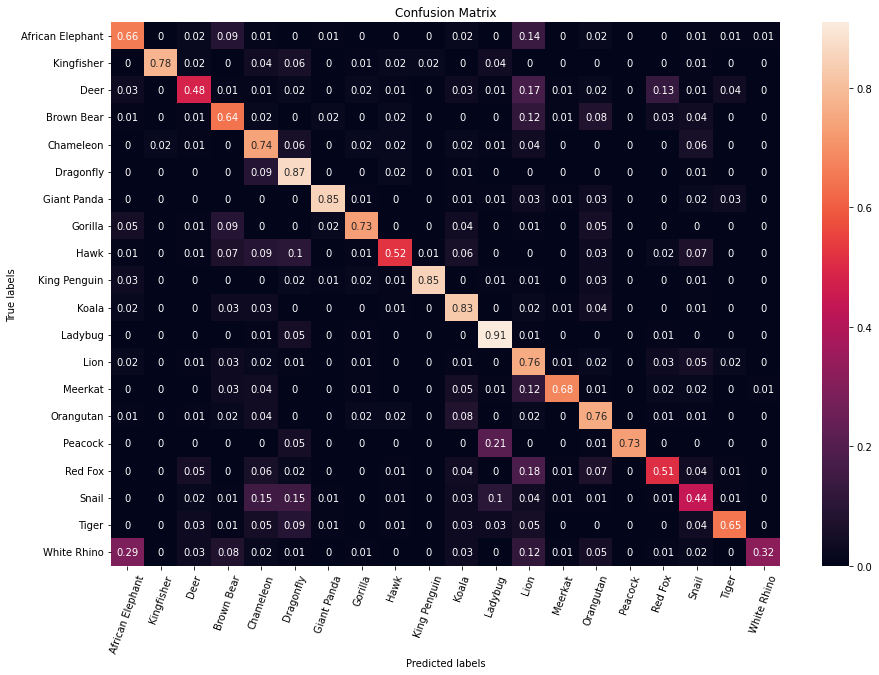

Predicted label ['Brown Bear' 'Chameleon' 'Chameleon' 'Chameleon' 'African Elephant'
 'Chameleon' 'Snail' 'Lion' 'Lion']
True label ['African Elephant' 'Koala' 'Dragonfly' 'Hawk' 'White Rhino' 'Lion'
 'Dragonfly' 'Brown Bear' 'Brown Bear']
Corresponding images are shown below


0.6855

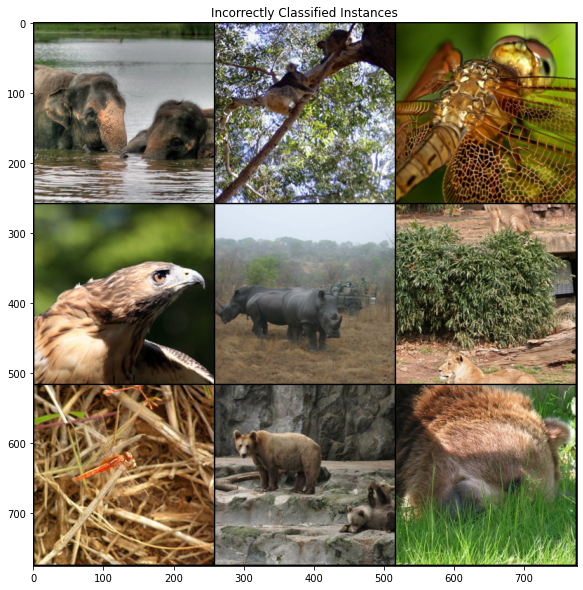

In [10]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

Given many parameters and data, strategies like Random Search (RS) and Bayesian Optimization (BO) are more computationally efficient than the brute-force grid search. RS can try different parameter combinations in relatively few iterations, as it randomly picks a set of parameter values from the hyperparameter space. BO builds a probabilistic model to optimise hyperparameter values iteratively. The model becomes more confident that the predicted hyperparameters improve accuracy at each iteration, resulting in fewer iterations overall. Here I experimented with both RS and BO. The result is that RS performs better in test accuracy (68.6% for RS, 51.2% for BO) and is more time-efficient.



---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

To boost the performance above baseline, I applied data augmentation to training data by randomly rotating the images, blurring them using Gaussian kernels, and randomly changing their brightness and colour. Data augmentation helps increase the diversity of the training set, improving model robustness and reducing overfitting. They helped boost the accuracy from ~40% to 47.3% without any hyperparameter tuning.

Hyperparameter tuning is about tweaking the set of hyperparameters to optimise model performance. I tried Random Search (RS) and Bayesian Optimisation (BO). For RS, I tuned the learning rate, the number of epochs, and the network's optimiser. The Adam optimiser with a learning rate of 0.001 and 10 epochs helped boost the accuracy from 47.3% to 68.6% with data augmentation in place.

For BO, I chose to tune the Adam optimiser's learning rate and weight decay. BO is much more time-consuming to run, and it kept timing out in Colab. The best test accuracy I could get is 51.2% (with data augmentation) with a learning rate of 0.0003 and a weight decay of 0.005. Therefore, I chose to stick with the tuned parameters in RS and used that as the final model.

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

In the low-level layers, I observe some basic structures of the penguins, such as the contour, edges and corners, and some highlighted high-intensity parts of the bodies. As we move to high-level layers, the content of the images become harder to recognise, and the feature maps show more complex, abstract patterns built on top of those lower-layer features. More pixels of high intensity are revealed.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

I think the network performance is acceptable but not sufficiently good. Although data augmentation and Random Search (RS) significantly boosted the test accuracy (~40% to 68.6%), more hyperparameters, such as weight initialisation methods, could be tuned. More combinations of hyperparameters in RS could be tried, and one could experiment with other data augmentation methods such as random cropping.

The training log shows overall a decreasing loss over epochs, despite at epochs 5 and 7, where there could be some overfitting problem. The loss is still decreasing after ten epochs, suggesting that increasing the number of epochs may lead to better network performance. Other ways of improvement include increasing network complexity and training data size.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

As we are solving an multi-class classification problem, apart from test accuracy, we could construct a confusion matrix with TP, TF, NP, TF counts for each class and compute measures such as precision, recall and F1 score. Plotting the training and test losses over epochs also allows us to examine any overfitting.

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [11]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

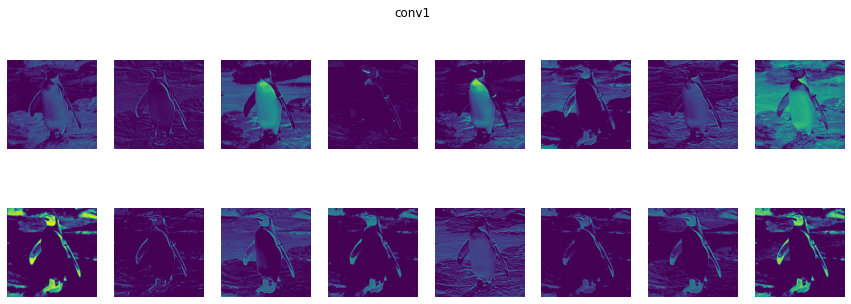

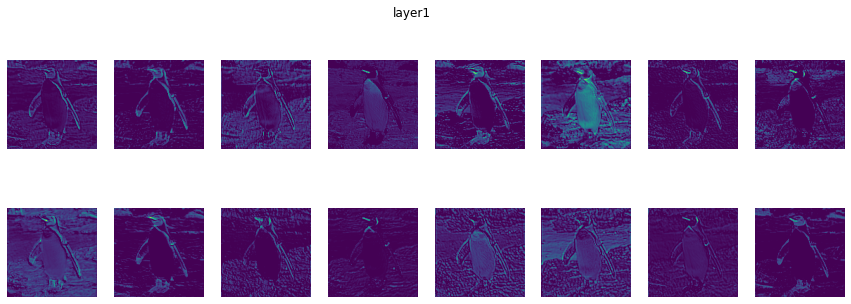

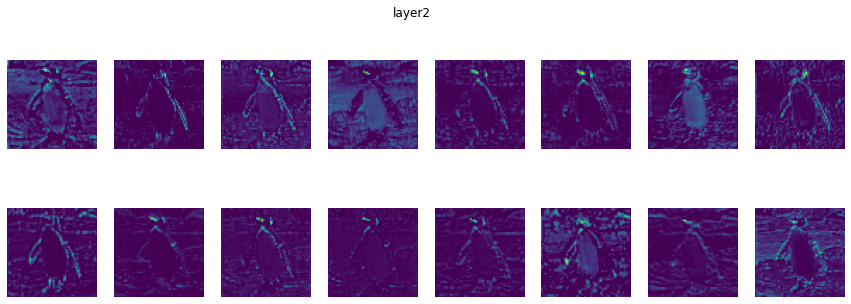

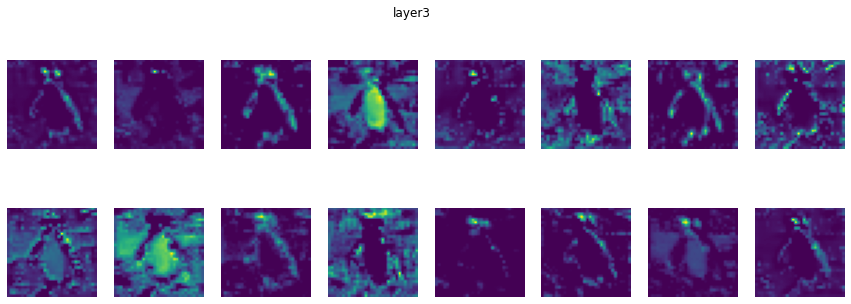

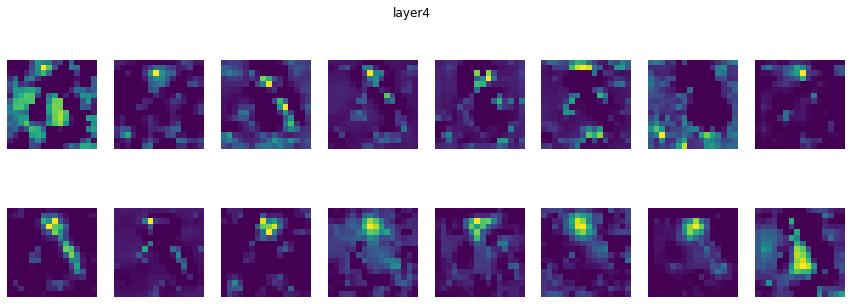

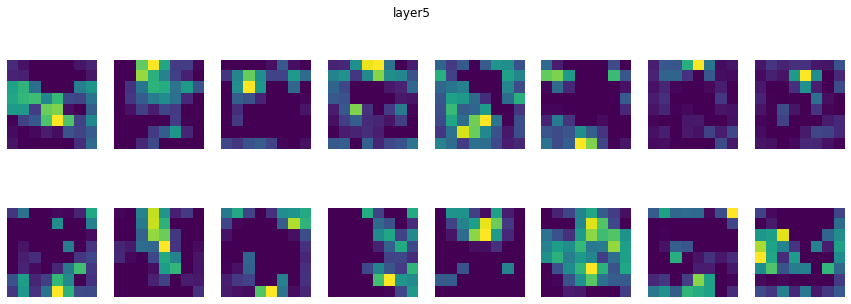

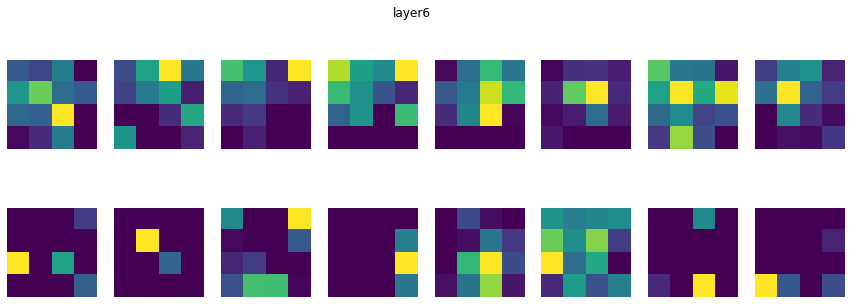

In [12]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [24]:
grader.check_all()

BatchNorm Layer results: All test cases passed!

Convolution Layer results: All test cases passed!

Linear Layer results: All test cases passed!

MaxPool Layer results: All test cases passed!

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)